In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
dataset = pd.read_excel('G:/4-1 Thesis/fiverr_thesis.xlsx')

In [3]:
dataset.head()

,fiverr_profile,Category,Subcategory,Pricing,Sales,Stars
0,aaimran,"Data,Business","Data Processing,Data Entry,E-Commerce Management","10,10,10","15,242,1","4.9,4.9,5"
1,aaliyaan,"Programming & Tech,Digital Marketing","E-Commerce Development,WordPress,Video Marketi...","145,45,30,20,20,145","1,331,129,560,516,3","5,5,4.9,4.9,4.9,5"
2,abantikabose,"Digital Marketing,Writing & Translation","Book & eBook Marketing,Book & eBook Writing,Bo...","25,30,10,50","162,79,334,29","5,4.9,5,5"
3,abdelhamid19,Digital Marketing,"Web Analytics,Web Traffic","100,70","3,74","5,5"
4,abidhussain1918,"Digital Marketing,Data,Business","Influencer Marketing,Data Processing,Data Entr...","5,10,10,10","1,16,73,2","5,4.9,4.9,5"


In [4]:
dataset['Category'].isnull().sum()

0

In [5]:
#print(dataset.shape)
#print(dataset.columns) 
#print(dataset.head(10))
#print(dataset.describe())


# Category Part

In [6]:
column_list_category = []
for index, rows in dataset.iterrows():
    my_string = rows.Category
    my_list = my_string.split(",")
    column_list_category.append(my_list)
#print(column_list_category)

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list_category).transform(column_list_category)
transaction_df_cat = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df_cat.head()

,Business,Data,Digital Marketing,Graphics & Design,Lifestyle,Music & Audio,Programming & Tech,Video & Animation,Writing & Translation
0,True,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False


In [8]:
item_count = {}
for col in transaction_df_cat.columns:
    item_count[col] = transaction_df_cat[col].sum()
item_freq_df_cat = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df_cat.shape, item_freq_df_cat.head(9)

((9, 1),
                        frequency
 Programming & Tech           390
 Digital Marketing            374
 Graphics & Design            372
 Writing & Translation        218
 Data                         174
 Business                     154
 Video & Animation            144
 Music & Audio                 46
 Lifestyle                     24)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

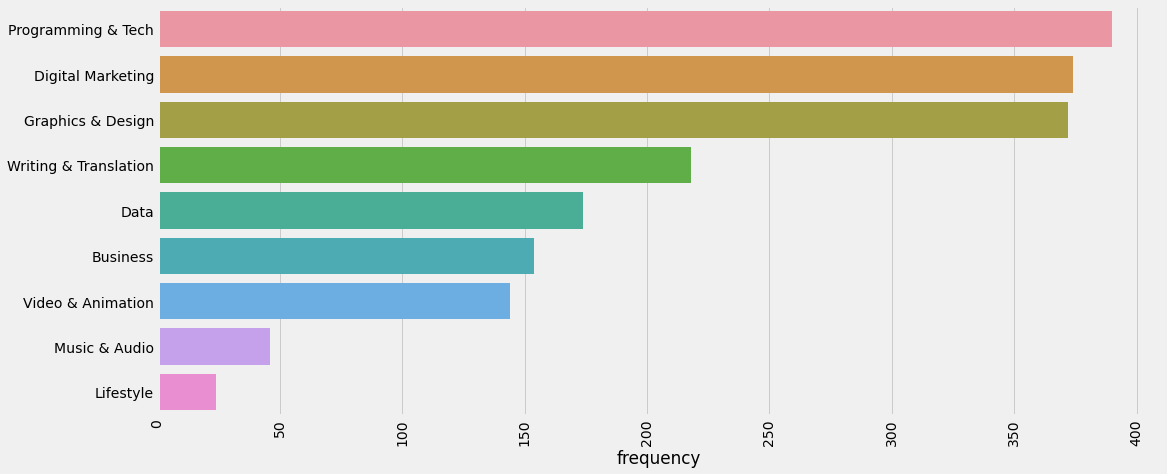

In [9]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df_cat.index[:9], x=item_freq_df_cat.frequency[:9])
plt.xticks(rotation=90)

In [10]:
apriori(transaction_df_cat, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.154,(Business)
1,0.174,(Data)
2,0.374,(Digital Marketing)
3,0.372,(Graphics & Design)
4,0.390,(Programming & Tech)
5,0.144,(Video & Animation)
6,0.218,(Writing & Translation)
7,0.146,"(Programming & Tech, Digital Marketing)"
8,0.110,"(Writing & Translation, Digital Marketing)"
9,0.108,"(Graphics & Design, Programming & Tech)"


In [11]:
print(f'freq>30: {item_freq_df_cat[item_freq_df_cat.frequency>30].shape[0]} items')
print(f'freq>20: {item_freq_df_cat[item_freq_df_cat.frequency>20].shape[0]} items')
print(f'freq>12: {item_freq_df_cat[item_freq_df_cat.frequency>12].shape[0]} items')

freq>30: 8 items
freq>20: 9 items
freq>12: 9 items


In [12]:
freq_itemset_support = apriori(transaction_df_cat, min_support=0.024, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.154,(Business)
1,0.174,(Data)
2,0.374,(Digital Marketing)
3,0.372,(Graphics & Design)
4,0.024,(Lifestyle)
5,0.046,(Music & Audio)
6,0.390,(Programming & Tech)
7,0.144,(Video & Animation)
8,0.218,(Writing & Translation)
9,0.066,"(Data, Business)"


In [13]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.50)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Data),(Programming & Tech),0.174,0.390,0.088,0.505747,1.296788,0.020140,1.234186
1,(Writing & Translation),(Digital Marketing),0.218,0.374,0.110,0.504587,1.349164,0.028468,1.263593
2,(Video & Animation),(Graphics & Design),0.144,0.372,0.076,0.527778,1.418757,0.022432,1.329882
3,"(Programming & Tech, Business)",(Data),0.054,0.174,0.028,0.518519,2.979991,0.018604,1.715538
4,"(Writing & Translation, Business)",(Digital Marketing),0.052,0.374,0.032,0.615385,1.645413,0.012552,1.627600
5,"(Graphics & Design, Writing & Translation)",(Digital Marketing),0.052,0.374,0.030,0.576923,1.542575,0.010552,1.479636
6,"(Writing & Translation, Programming & Tech)",(Digital Marketing),0.058,0.374,0.034,0.586207,1.567398,0.012308,1.512833


In [14]:
#overal_association_rules = association_rules(freq_itemset_support, metric="lift", min_threshold=1.0)
#overal_association_rules

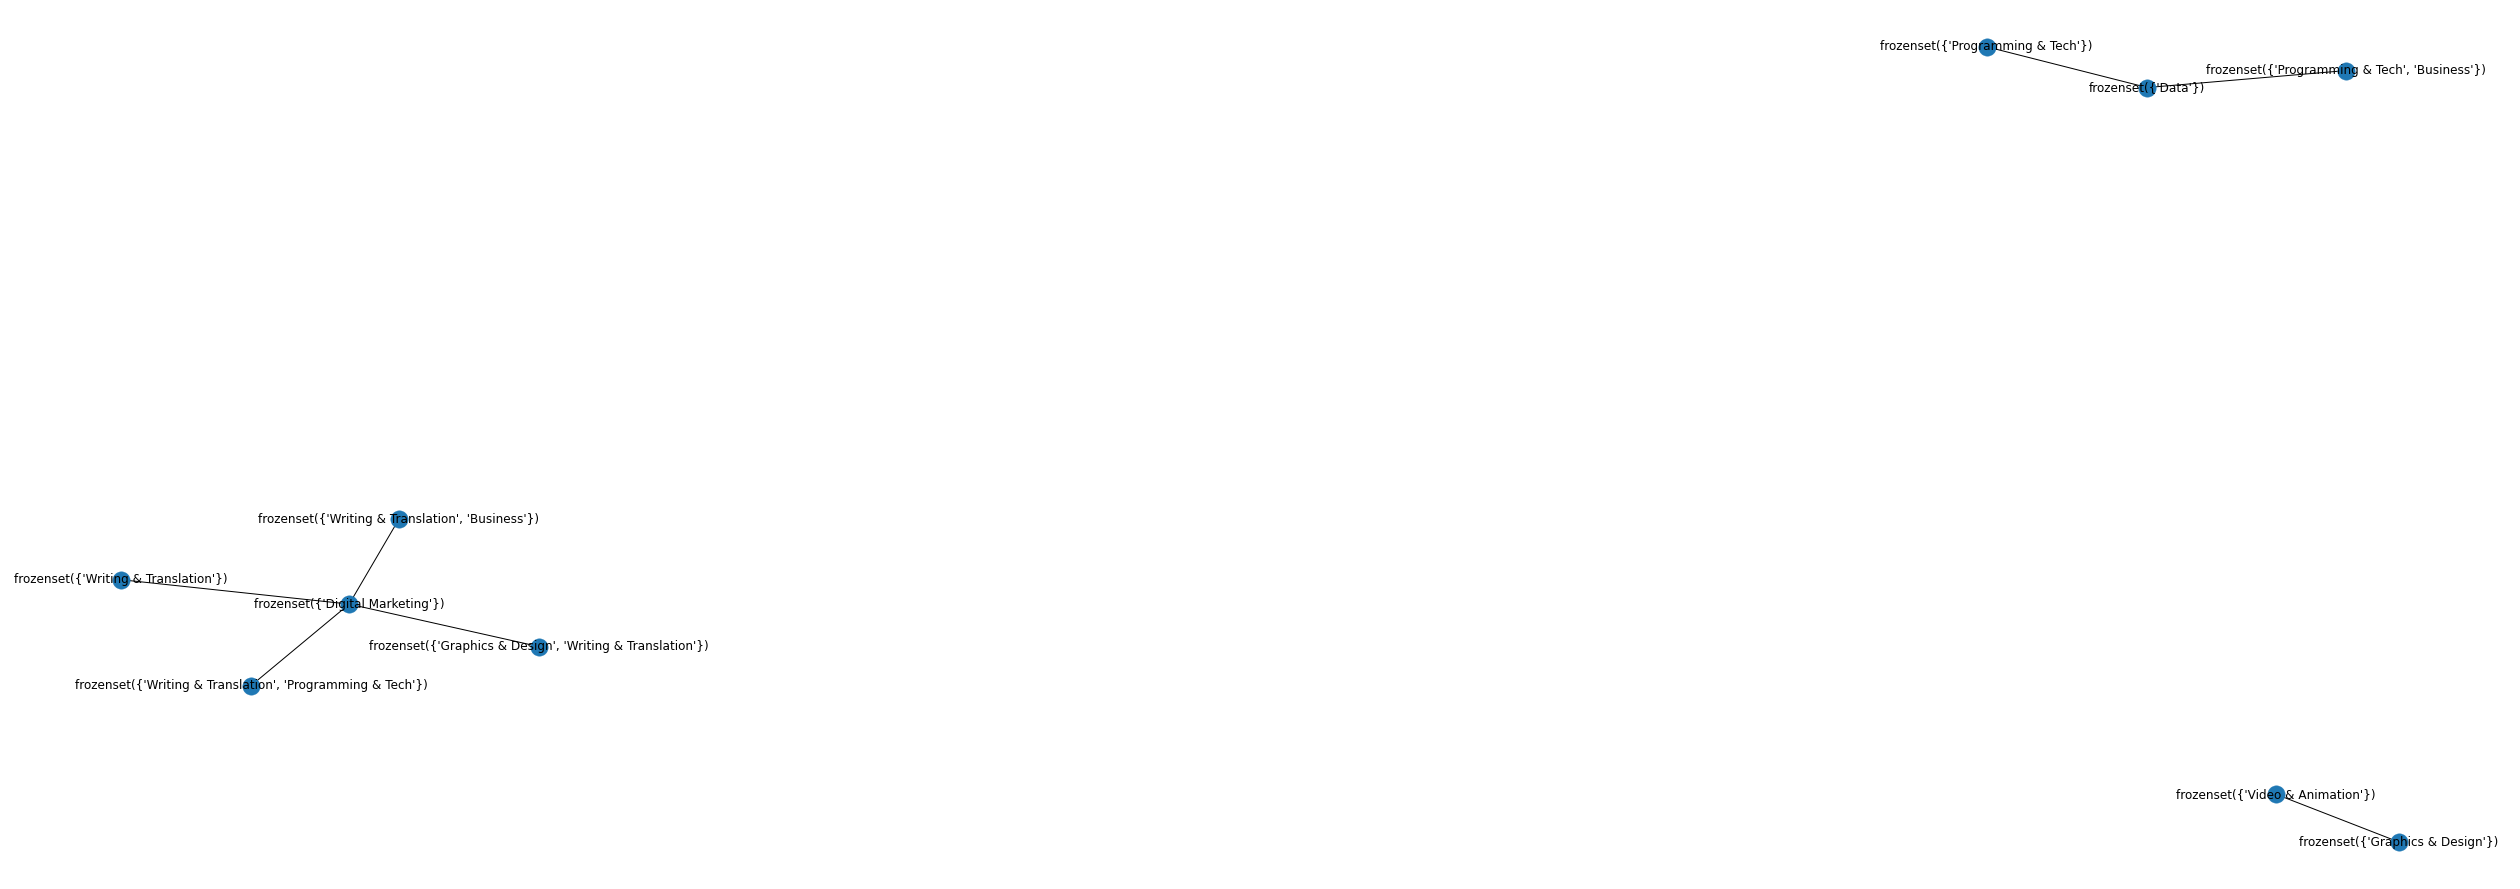

In [15]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,15))
GA=nx.from_pandas_edgelist(overal_association_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [16]:
overal_association_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(Writing & Translation, Business)",(Digital Marketing),0.052,0.374,0.032,0.615385,1.645413,0.012552,1.627600
6,"(Writing & Translation, Programming & Tech)",(Digital Marketing),0.058,0.374,0.034,0.586207,1.567398,0.012308,1.512833
5,"(Graphics & Design, Writing & Translation)",(Digital Marketing),0.052,0.374,0.030,0.576923,1.542575,0.010552,1.479636
2,(Video & Animation),(Graphics & Design),0.144,0.372,0.076,0.527778,1.418757,0.022432,1.329882
3,"(Programming & Tech, Business)",(Data),0.054,0.174,0.028,0.518519,2.979991,0.018604,1.715538
0,(Data),(Programming & Tech),0.174,0.390,0.088,0.505747,1.296788,0.020140,1.234186
1,(Writing & Translation),(Digital Marketing),0.218,0.374,0.110,0.504587,1.349164,0.028468,1.263593


In [17]:
#overal_association_rules.sort_values('lift', ascending=False)

# Sub Category Part

In [18]:
column_list_subcategory = []
for index, rows in dataset.iterrows():
    my_string = rows.Subcategory
    my_list = my_string.split(",")
    column_list_subcategory.append(my_list)
#print(column_list)

In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list_subcategory).transform(column_list_subcategory)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Ad Copy,Affiliate Marketing,Album Cover Design,Animated GIFs,Animation for Kids,Animation for Streamers,App & Website Previews,App Design,Architecture & Interior Design,Articles & Blog Posts,...,Web Traffic,Website Builders & CMS,Website Content,Website Design,Wellness,Whiteboard & Animated Explainers,WordPress,Wordpress,eLearning Content Development,eLearning Video Production
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(15)

((176, 1),
                                   frequency
 Logo Design                             162
 WordPress                               150
 Social Media Marketing                  116
 Search Engine Optimization (SEO)        108
 Other                                    96
 Data Entry                               92
 Articles & Blog Posts                    82
 Social Media Design                      78
 Web Analytics                            72
 E-Commerce Development                   68
 Mobile Apps                              68
 Web Programming                          66
 Book & eBook Marketing                   62
 Whiteboard & Animated Explainers         60
 Data Science                             54)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

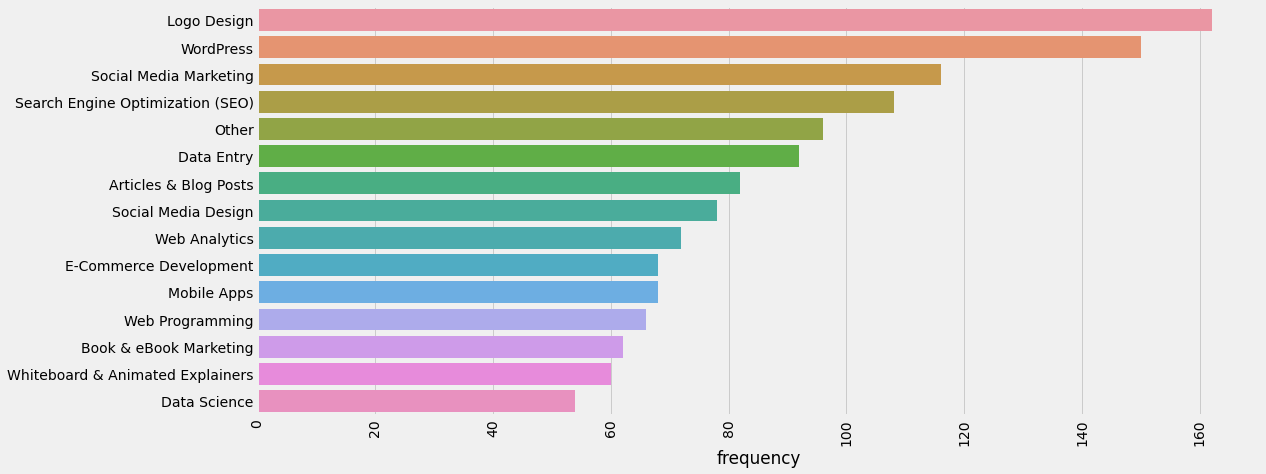

In [21]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:15], x=item_freq_df.frequency[:15])
plt.xticks(rotation=90)

In [22]:
apriori(transaction_df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.162,(Logo Design)
1,0.108,(Search Engine Optimization (SEO))
2,0.116,(Social Media Marketing)
3,0.150,(WordPress)


In [23]:
print(f'freq>30: {item_freq_df[item_freq_df.frequency>30].shape[0]} items')
print(f'freq>20: {item_freq_df[item_freq_df.frequency>24].shape[0]} items')
print(f'freq>12: {item_freq_df[item_freq_df.frequency>12].shape[0]} items')

freq>30: 41 items
freq>20: 50 items
freq>12: 76 items


In [24]:
freq_itemset_support = apriori(transaction_df, min_support=0.02, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.028,(App Design)
1,0.082,(Articles & Blog Posts)
2,0.062,(Book & eBook Marketing)
3,0.030,(Book & eBook Writing)
4,0.042,(Book Design)
...,...,...
75,0.022,"(Short Video Ads, Whiteboard & Animated Explai..."
76,0.020,"(Social Media Design, Social Media Marketing)"
77,0.024,"(WordPress, Social Media Marketing)"
78,0.026,"(WordPress, Web Programming)"


In [25]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.50)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Website Content),(Articles & Blog Posts),0.036,0.082,0.022,0.611111,7.452575,0.019048,2.360571
1,(Brand Style Guides),(Logo Design),0.050,0.162,0.046,0.920000,5.679012,0.037900,10.475000
2,(Brochure Design),(Flyer Design),0.032,0.054,0.026,0.812500,15.046296,0.024272,5.045333
3,(Business Cards & Stationery),(Logo Design),0.040,0.162,0.024,0.600000,3.703704,0.017520,2.095000
4,(Sales),(Data Entry),0.034,0.092,0.026,0.764706,8.312020,0.022872,3.859000
5,(Virtual Assistant),(Data Entry),0.052,0.092,0.032,0.615385,6.688963,0.027216,2.360800
6,(Data Visualization),(Data Science),0.034,0.054,0.020,0.588235,10.893246,0.018164,2.297429
7,(E-Commerce Development),(WordPress),0.068,0.150,0.034,0.500000,3.333333,0.023800,1.700000
8,(Flyer Design),(Logo Design),0.054,0.162,0.032,0.592593,3.657979,0.023252,2.056909
9,(Flyer Design),(Social Media Design),0.054,0.078,0.028,0.518519,6.647673,0.023788,1.914923


In [26]:
#overal_association_rules = association_rules(freq_itemset_support, metric="lift", min_threshold=1.0)
#overal_association_rules

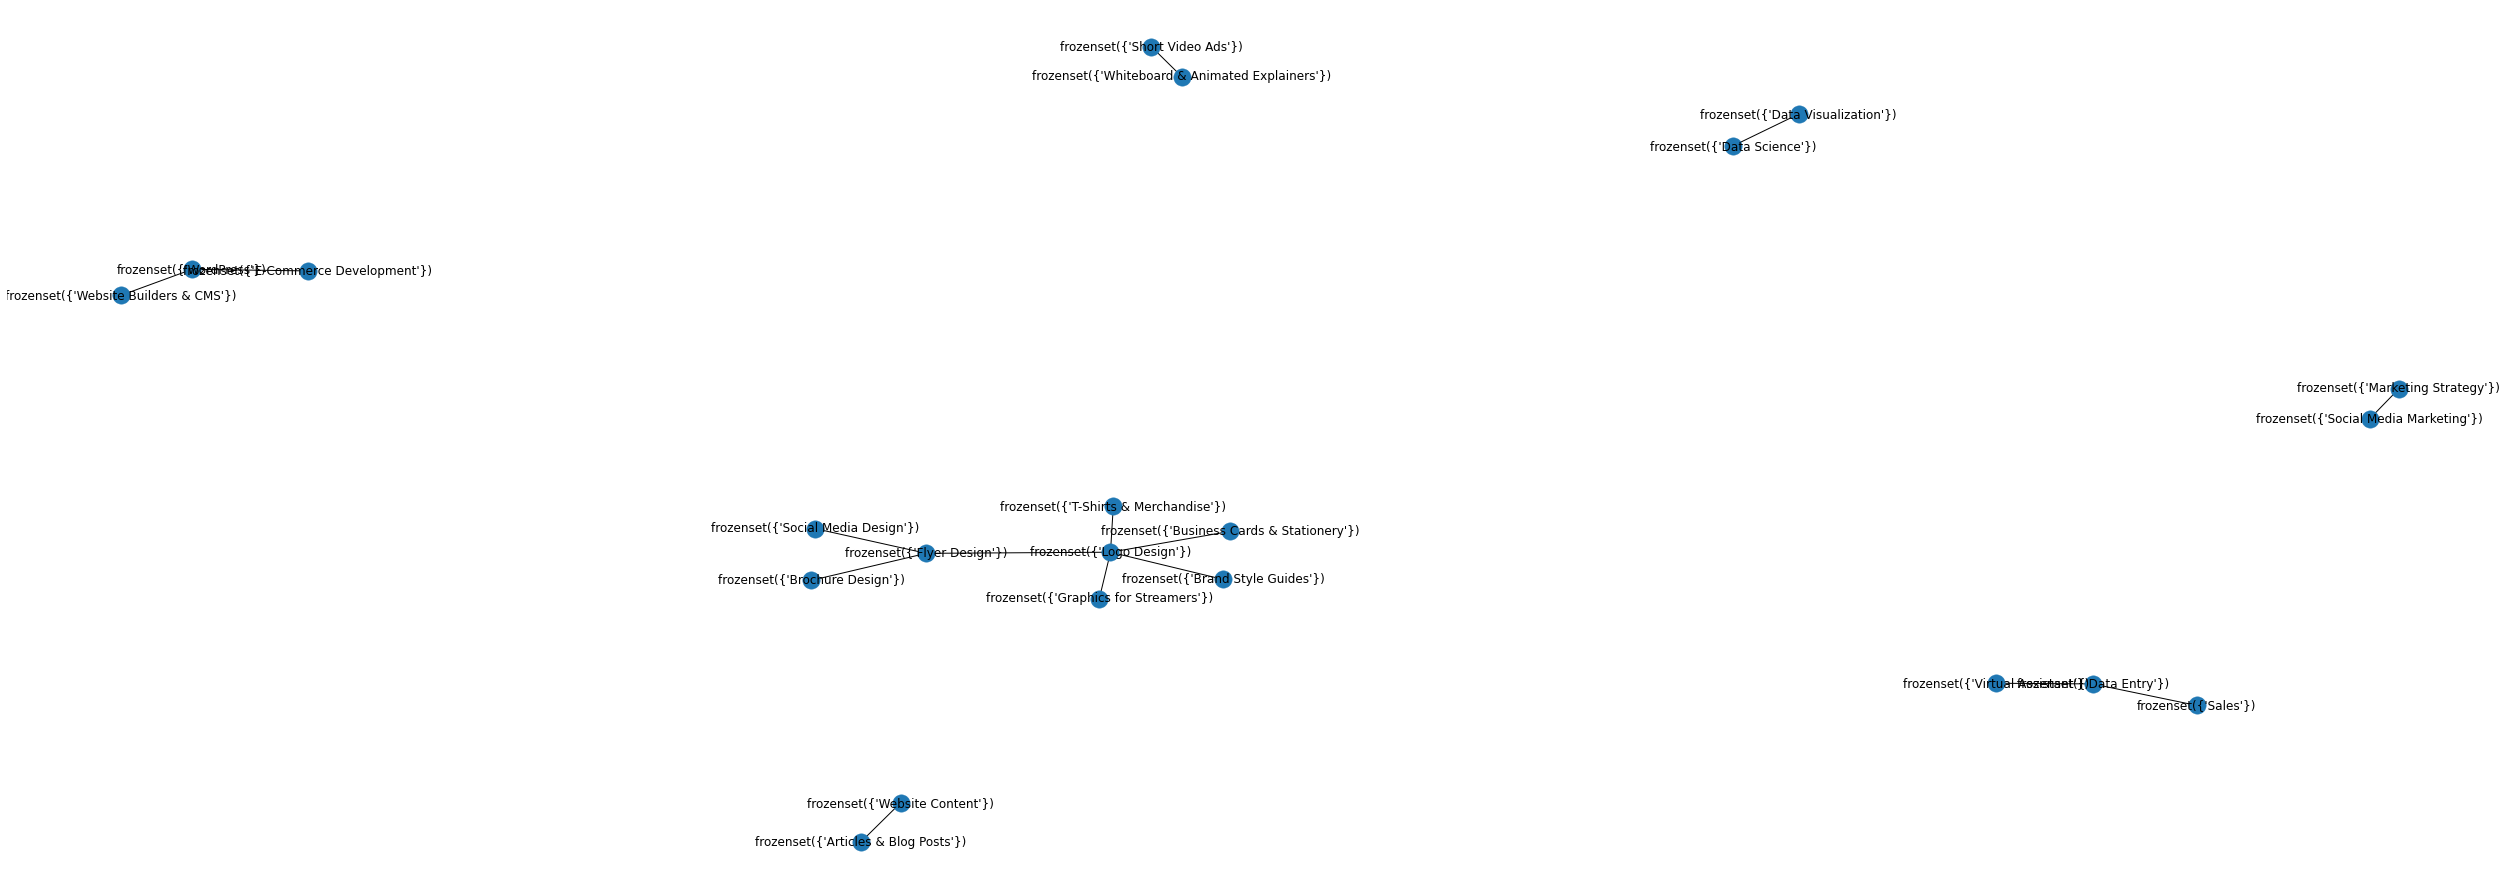

In [27]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,15))
GA=nx.from_pandas_edgelist(overal_association_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [28]:
overal_association_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Brand Style Guides),(Logo Design),0.050,0.162,0.046,0.920000,5.679012,0.037900,10.475000
2,(Brochure Design),(Flyer Design),0.032,0.054,0.026,0.812500,15.046296,0.024272,5.045333
4,(Sales),(Data Entry),0.034,0.092,0.026,0.764706,8.312020,0.022872,3.859000
11,(T-Shirts & Merchandise),(Logo Design),0.028,0.162,0.020,0.714286,4.409171,0.015464,2.933000
10,(Graphics for Streamers),(Logo Design),0.032,0.162,0.022,0.687500,4.243827,0.016816,2.681600
14,(Website Builders & CMS),(WordPress),0.034,0.150,0.022,0.647059,4.313725,0.016900,2.408333
5,(Virtual Assistant),(Data Entry),0.052,0.092,0.032,0.615385,6.688963,0.027216,2.360800
0,(Website Content),(Articles & Blog Posts),0.036,0.082,0.022,0.611111,7.452575,0.019048,2.360571
13,(Short Video Ads),(Whiteboard & Animated Explainers),0.036,0.060,0.022,0.611111,10.185185,0.019840,2.417143
3,(Business Cards & Stationery),(Logo Design),0.040,0.162,0.024,0.600000,3.703704,0.017520,2.095000


In [29]:
#overal_association_rules.sort_values('lift', ascending=False)

# Pricing_Sales Relations

In [81]:
dataset_1 = pd.read_excel('G:/4-1 Thesis/last.xlsx')

In [82]:
dataset_1.head()

,Category,Subcat,price,price_cat,sales,sales_cat
0,Programming & Tech,Data Analysis & Reports,155,price between 105 to 500,10,Low Sales
1,Lifestyle,Greeting Cards & Videos,5,Five USD,1k+,High Sales
2,Programming & Tech,Website Builders & CMS,75,price between 55 to 100,68,Medium Sales
3,Lifestyle,Cooking Lessons,20,price_between 15 to 20,5,Low Sales
4,Writing & Translation,Legal Writing,10,Ten USD,2,Low Sales


In [83]:
#np.random.seed(0)
#df = pd.DataFrame({"a": np.random.random_integers(1, high=100, size=6183)})
#ranges = [0,5,10,20,30,50,100,500,10000]
#df.groupby(pd.cut(dataset_1.sales_cat, ranges)).count()

In [84]:
column_list = []
for index, rows in dataset_1.iterrows():
    my_list = [rows.Category,rows.price_cat,rows.sales_cat]
    column_list.append(my_list)
#print(column_list)

In [85]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list).transform(column_list)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Business,Digital Marketing,Five USD,High Sales,Lifestyle,Low Sales,Medium Sales,Moderate Sales,Music & Audio,No Sale,Programming & Tech,Ten USD,Video & Animation,Writing & Translation,price above 500,price between 105 to 500,price between 25 to 30,price between 35 to 50,price between 55 to 100,price_between 15 to 20
0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False


In [86]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.tail(15)

((20, 1),
                           frequency
 Five USD                        986
 Moderate Sales                  911
 price between 55 to 100         890
 Ten USD                         886
 price between 35 to 50          883
 Lifestyle                       864
 Programming & Tech              807
 price between 105 to 500        791
 Music & Audio                   768
 Business                        720
 price between 25 to 30          668
 No Sale                         493
 Medium Sales                    389
 Digital Marketing               336
 price above 500                  85)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

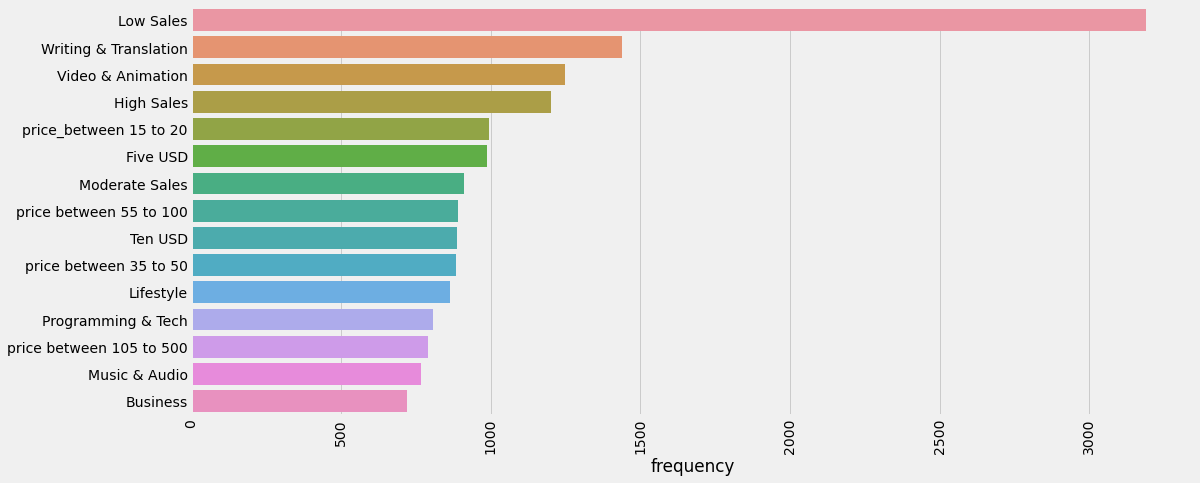

In [87]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:15], x=item_freq_df.frequency[:15])
plt.xticks(rotation=90)

In [88]:
apriori(transaction_df, min_support=0.0067, use_colnames=True)

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.194242,(High Sales)
4,0.139738,(Lifestyle)
...,...,...
167,0.019570,"(price between 35 to 50, Low Sales, Writing & ..."
168,0.015850,"(Writing & Translation, Low Sales, price betwe..."
169,0.023613,"(price_between 15 to 20, Writing & Translation..."
170,0.006955,"(price between 55 to 100, Moderate Sales, Vide..."


In [89]:
print(f'freq>30: {item_freq_df[item_freq_df.frequency>47].shape[0]} items')
print(f'freq>20: {item_freq_df[item_freq_df.frequency>24].shape[0]} items')
print(f'freq>12: {item_freq_df[item_freq_df.frequency>12].shape[0]} items')

freq>30: 20 items
freq>20: 20 items
freq>12: 20 items


In [133]:
freq_itemset_support = apriori(transaction_df, min_support=0.005, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.194242,(High Sales)
4,0.139738,(Lifestyle)
...,...,...
190,0.005175,"(price between 35 to 50, Moderate Sales, Video..."
191,0.006955,"(price between 55 to 100, Moderate Sales, Vide..."
192,0.005014,"(Writing & Translation, price between 105 to 5..."
193,0.007278,"(Writing & Translation, price between 55 to 10..."


In [134]:
from mlxtend.frequent_patterns import apriori

apriori(transaction_df, min_support=0.005, use_colnames=True)

,support,itemsets
0,0.116448,(Business)
1,0.054343,(Digital Marketing)
2,0.159470,(Five USD)
3,0.194242,(High Sales)
4,0.139738,(Lifestyle)
...,...,...
190,0.005175,"(price between 35 to 50, Moderate Sales, Video..."
191,0.006955,"(price between 55 to 100, Moderate Sales, Vide..."
192,0.005014,"(Writing & Translation, price between 105 to 5..."
193,0.007278,"(Writing & Translation, price between 55 to 10..."


In [137]:
rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.50)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Business),(Low Sales),0.116448,0.515769,0.064532,0.554167,1.074447,0.004471,1.086126
1,(Five USD),(Low Sales),0.159470,0.515769,0.100760,0.631846,1.225056,0.018511,1.315294
2,(Lifestyle),(Low Sales),0.139738,0.515769,0.087175,0.623843,1.209539,0.015102,1.287309
3,(Ten USD),(Low Sales),0.143296,0.515769,0.082161,0.573363,1.111667,0.008253,1.134996
4,(Writing & Translation),(Low Sales),0.232897,0.515769,0.126476,0.543056,1.052905,0.006355,1.059715
5,(price between 25 to 30),(Low Sales),0.108038,0.515769,0.054181,0.501497,0.972329,-0.001542,0.971370
6,(price_between 15 to 20),(Low Sales),0.160763,0.515769,0.086528,0.538229,1.043547,0.003611,1.048640
7,"(Five USD, Business)",(Low Sales),0.013747,0.515769,0.008087,0.588235,1.140501,0.000996,1.175989
8,"(Ten USD, Business)",(Low Sales),0.013424,0.515769,0.008087,0.602410,1.167983,0.001163,1.217914
9,"(price between 105 to 500, Business)",(Low Sales),0.016012,0.515769,0.008248,0.515152,0.998803,-0.000010,0.998726


In [138]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Business),(Low Sales),0.116448,0.515769,0.064532,0.554167,1.074447,0.004471,1.086126,1
1,(Five USD),(Low Sales),0.159470,0.515769,0.100760,0.631846,1.225056,0.018511,1.315294,1
2,(Lifestyle),(Low Sales),0.139738,0.515769,0.087175,0.623843,1.209539,0.015102,1.287309,1
3,(Ten USD),(Low Sales),0.143296,0.515769,0.082161,0.573363,1.111667,0.008253,1.134996,1
4,(Writing & Translation),(Low Sales),0.232897,0.515769,0.126476,0.543056,1.052905,0.006355,1.059715,1
5,(price between 25 to 30),(Low Sales),0.108038,0.515769,0.054181,0.501497,0.972329,-0.001542,0.971370,1
6,(price_between 15 to 20),(Low Sales),0.160763,0.515769,0.086528,0.538229,1.043547,0.003611,1.048640,1
7,"(Five USD, Business)",(Low Sales),0.013747,0.515769,0.008087,0.588235,1.140501,0.000996,1.175989,2
8,"(Ten USD, Business)",(Low Sales),0.013424,0.515769,0.008087,0.602410,1.167983,0.001163,1.217914,2
9,"(price between 105 to 500, Business)",(Low Sales),0.016012,0.515769,0.008248,0.515152,0.998803,-0.000010,0.998726,2


In [140]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.5) &
       (rules['lift'] > 1.0) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
7,"(Five USD, Business)",(Low Sales),0.013747,0.515769,0.008087,0.588235,1.140501,0.000996,1.175989,2
8,"(Ten USD, Business)",(Low Sales),0.013424,0.515769,0.008087,0.602410,1.167983,0.001163,1.217914,2
10,"(price between 25 to 30, Business)",(Low Sales),0.015688,0.515769,0.008248,0.525773,1.019397,0.000157,1.021096,2
13,"(price_between 15 to 20, Business)",(Low Sales),0.019246,0.515769,0.012292,0.638655,1.238259,0.002365,1.340081,2
14,"(Five USD, Lifestyle)",(Low Sales),0.045447,0.515769,0.032832,0.722420,1.400666,0.009392,1.744473,2
15,"(Music & Audio, Five USD)",(Low Sales),0.017629,0.515769,0.010189,0.577982,1.120621,0.001097,1.147417,2
16,"(Programming & Tech, Five USD)",(Low Sales),0.016820,0.515769,0.009542,0.567308,1.099926,0.000867,1.119112,2
17,"(Five USD, Video & Animation)",(Low Sales),0.024422,0.515769,0.015203,0.622517,1.206968,0.002607,1.282787,2
18,"(Writing & Translation, Five USD)",(Low Sales),0.034611,0.515769,0.020702,0.598131,1.159687,0.002851,1.204947,2
19,"(Ten USD, Lifestyle)",(Low Sales),0.033641,0.515769,0.019570,0.581731,1.127890,0.002219,1.157702,2
